<a href="https://colab.research.google.com/github/entc-17-fyp-20/WPF_Data_Visualization/blob/Kusal/fyp_wpf_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# !pip install -q dash
# !pip install  jupyter-dash
# !pip install -q dash_core_components
# !pip install -q dash_html_components
# !pip install -q dash_table
# !pip install pyngrok --quiet


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import seed
from google.colab import files
import io

import plotly.express as px
import plotly.graph_objects as go

''' import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output 
 '''

' import dash\nimport dash_core_components as dcc\nimport dash_html_components as html\nfrom dash.dependencies import Input, Output \n '

In [55]:
url1 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/S6%2010%20seconed%20data.csv' #S6 10 seconed data.csv
url2 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_1.csv' #AE59_1
url3 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_2.csv' #AE59_2
url4 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20June%2010%20sec%20data.csv' #V08 June 10 sec data.csv; does not contain current columns
url5 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20June%2010%20sec%20data.csv' #V13 June 10 sec data.csv
url6 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20July%2010%20sec%20data.csv' #V08 July 10 sec data.csv
url7 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20July%2010%20sec%20data.csv' #V13 July 10 sec data.csv
df = pd.read_csv(url1)

**When upload CSV files from local storage**

In [ ]:
data = files.upload()

Saving S6 10 seconed data (1).csv to S6 10 seconed data (1).csv


In [4]:
df = pd.read_csv(io.StringIO(data['S6 10 seconed data (1).csv'].decode('utf-8')))


NameError: ignored

**DATA SET**


In [56]:
df

,Date & Time,Frequency Hz,Voltage R Phase V,Voltage S Phase V,Voltage T Phase V,Current R Phase A,Current S Phase A,Current T Phase A,Wind Speed m/s,Active Power kW,Reactive Power kVAR,Generator RPM,Hydraulic unit Pressure in bar,Ambient Temperature,Nacelle Temperature,Gearbox oil Temperature,Gearbox Bearing Temperature,Generator Winding Temperature R,Generator Winding Temperature S,Generator Winding Temperature T,Hydraulic oil Temperature,Main bearing Temperature,Generator Bearing Temperature DE,Generator Bearing Temperature NDE
0,FECHA_HORA,SSV_5SM_006_XS_FRQ_MEDI,SSV_5SM_006_XS_TNS_FASR,SSV_5SM_006_XS_TNS_FASS,SSV_5SM_006_XS_TNS_FAST,SSV_5SM_006_XS_INT_FASR,SSV_5SM_006_XS_INT_FASS,SSV_5SM_006_XS_INT_FAST,SSV_5SM_006_XS_VEL_WIND,SSV_5SM_006_XS_POT_MEDI,SSV_5SM_006_XS_POT_REAC,SSV_5SM_006_XS_VEL_LGMD,SSV_5SM_006_XS_PRS_PRPL,SSV_5SM_006_XS_TMP_0004,SSV_5SM_006_XS_TMP_V006,SSV_5SM_006_XS_TMP_V007,SSV_5SM_006_XS_TMP_V008,SSV_5SM_006_XS_TMP_V003,SSV_5SM_006_XS_TMP_V004,SSV_5SM_006_XS_TMP_V005,SSV_5SM_006_XS_TMP_V002,SSV_5SM_006_XS_TMP_V001,SSV_5SM_006_XS_TMP_0008,SSV_5SM_006_XS_TMP_0007
1,24/06/2021 00:00:00,50.27,590.5,588.6,585.7,435.7,427.5,426.6,10.4,737.8,1.3,1486.6,166.7,31.6,34.2,70.2,79.7,139.9,132.9,138.1,53.3,43.9,74.6,72.4
2,24/06/2021 00:00:10,50.26,585.6,587.4,591.3,418.9,413.6,410.7,11.4,745.5,1.7,1482.2,180.3,31.4,34.3,69.5,79.9,139.1,132.5,138.1,53.6,43.8,74.5,72.6
3,24/06/2021 00:00:20,50.24,591.8,589.5,586.5,429.8,425.6,421.3,10.2,732.7,8.2,1500,166.8,31.4,34.3,69.6,79.9,139.8,133.4,138.2,53.6,43.9,74.5,72.7
4,24/06/2021 00:00:30,50.22,591.1,588.5,584.5,425.9,427.1,441.2,10.1,743.1,8.4,1493.2,167.4,31.4,34.3,70.2,79.7,139.5,133.2,137.8,53.7,43.9,74.6,72.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8636,24/06/2021 23:59:10,50.04,581.8,580.3,581.1,236.1,237,236.7,7.9,404.2,-7.2,1468.4,179.8,31,32.3,60.8,73.4,95.2,90.9,95.9,53.6,43.7,61.8,65.4
8637,24/06/2021 23:59:20,50.12,580.4,581,583.2,217.6,221.4,220.9,7.4,367.3,8.5,1426.5,162.7,31,32.3,61.3,73.8,95,89.4,95,53.6,43.7,61.8,65.2
8638,24/06/2021 23:59:30,50.08,578.3,583.7,580.9,195.9,196.9,191.6,7.7,329.3,-23.3,1425.1,169.7,31,32.2,60.5,73.6,94,90.4,94.1,53.8,43.7,61.9,65.3
8639,24/06/2021 23:59:40,50.1,582.5,577.5,576.7,270.7,272.2,268,8.4,465.7,-0.8,1512.8,177.4,30.9,32.2,61.4,73.6,95.2,90.7,94.9,53.7,43.6,62,65.3


In [57]:
df = df.drop([0])

df['Date & Time'] = pd.to_datetime(df['Date & Time'], format="%d/%m/%Y %H:%M:%S")
df["Active Power kW"] = pd.to_numeric(df["Active Power kW"], downcast="float")
df["Wind Speed m/s"] = pd.to_numeric(df["Wind Speed m/s"], downcast="float")

def hr_func(ts):
    return ts.hour
    
df["Hour"] = pd.to_numeric(df['Date & Time'].apply(hr_func), downcast="float")


In [58]:
df.shape

(8640, 25)

In [ ]:
''' fig = px.line(df, x="Date & Time" , y="Active Power kW") 
fig.show() '''

**Convert 10 seconds data to 10 min data by takin averages for 10 min**

In [59]:
active_power=df['Active Power kW']
#print(active_power.head(12))
active_power=np.array(active_power)

ac_pw = list() #ac_pw is the list containing 2 min wind power data
sume = 0
for i in range(len(active_power)):
  sume = sume+active_power[i]
  if((i+1)%12==0):
    ac_pw.append(sume/12)
    sume = 0

len(ac_pw)

720

In [60]:
active_power

array([737.8, 745.5, 732.7, ..., 329.3, 465.7, 486.5], dtype=float32)

In [61]:
ac_pw=pd.DataFrame(ac_pw)
ac_pw

,0
0,733.933334
1,729.591675
2,744.933334
3,734.916672
4,736.699992
...,...
715,375.166664
716,370.716662
717,275.491667
718,325.374997


**Array of Active Power kW**




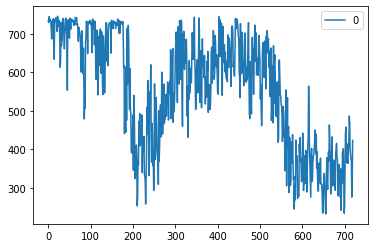

In [39]:
''' active_power=df['Active Power kW']
active_power=np.array(active_power)
active_power=pd.DataFrame(active_power) 
ac_pw=ac_pw[0:100]
ac_pw
active_power.head()
active_power.shape '''
ac_pw.plot()

**Graph of time vs Active_power**

In [62]:
fig = px.line(df, x="Date & Time" , y="Active Power kW") 
fig.show()

***Statistics of Data***




In [63]:
ac_pw.describe()

,0
count,720.000000
mean,553.563588
std,147.059530
min,231.816667
25%,423.489584
50%,581.291662
75%,691.327079
max,746.083338


**Training and testing data set and their statistics**

In [64]:
train,test=ac_pw[:-20],ac_pw[-20:]  #seperate train and test data arrays
print(train.shape)
print(test.shape)

print(train.describe())
print(test.describe())

(700, 1)
(20, 1)
                0
count  700.000000
mean   558.336869
std    146.050856
min    231.816667
25%    432.481248
50%    587.945830
75%    694.810411
max    746.083338
                0
count   20.000000
mean   386.498749
std     58.503010
min    252.933329
25%    364.072915
50%    382.316664
75%    421.677086
max    486.524996


**Autocorrelation**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
pyplot=plot_acf(train)
pyplot.set_size_inches(15,12)
pyplot.show()

**Trends,Seasons and Noise of the time series data**

<Figure size 432x288 with 0 Axes>

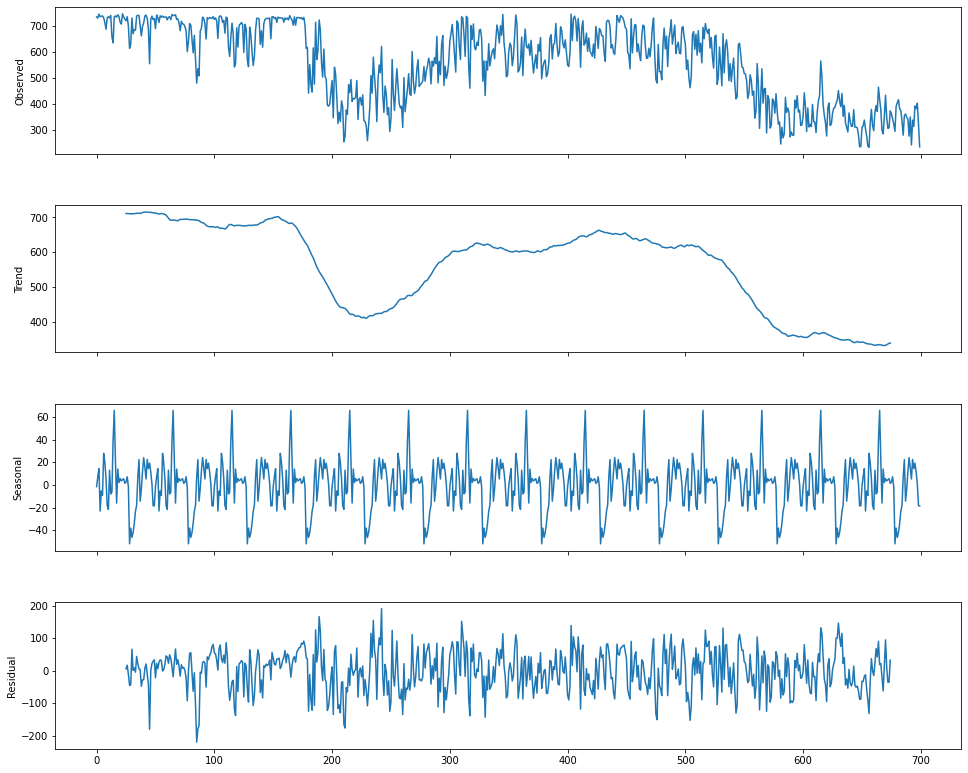

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train, model='additive',freq=50)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,12)

**Autocorrealation and Partial aurocorrealations plots**

plot the ACF and PACF to know about P and Q value



 

*   Statistical correlation summarizes the strength of the relationship between two variables
*   ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. In simple terms, it describes how well the present value of the series is related with its past values. A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot

*   ACF Determines the coefficient of MA model (p)
*   PACF is a partial auto-correlation function which is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed .Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals

*   PACF determines the coefficients of AR model (q)

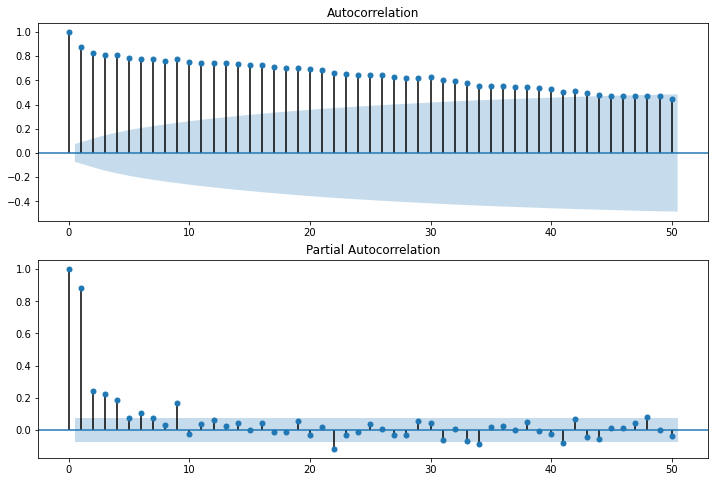

In [65]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train[0], lags=50, ax=ax1) 
# 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train[0], lags=50, ax=ax2)

**Checking stationarity**


1.   By seeeing them
2.   Summary statistics(Mean and Variance)
3.   Statistical tests






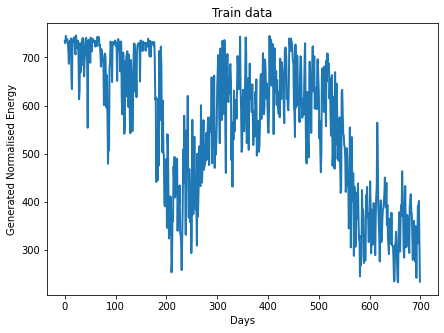

In [66]:
#By Seeing Plot
plt.figure(figsize = (7,5))
plt.plot(train,linewidth = 2)
plt.title("Train data")
plt.xlabel("Days")
plt.ylabel("Generated Normalised Energy")
plt.show()

In [47]:
# Summarry Statistics
split = round(len(ac_pw) / 2)
X1, X2 = ac_pw[0:split], ac_pw[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=608.699907, mean2=498.427268
variance1=16229.630838, variance2=20986.657594


In [69]:
# fit an ARIMA model and plot residual errors
import statsmodels.tsa.arima.model as st
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

ModuleNotFoundError: ignored

In [50]:
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

NameError: ignored

In [68]:
train=np.array(train)
from statsmodels.tsa.stattools import adfuller
result = adfuller(train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ValueError: ignored